# CDC WONDER Data Connector - Quick Start Guide

**CDC WONDER** (Wide-ranging Online Data for Epidemiologic Research) provides access to public health data including:
- **Mortality data**: Underlying and multiple causes of death
- **Natality data**: Birth statistics and trends
- **Population estimates**: Demographic population data
- **Cancer statistics**: Cancer incidence and mortality

**Key Features:**
- ✅ No API key required (publicly accessible)
- 🌐 National, state, and county-level data
- 📊 Supports mortality, natality, and population datasets
- 🔍 Query by year, geography, demographics, and cause

**Data Domains:**
- D04: Health (primary)
- D25: Food & Nutrition
- D28: Mental Health

---

**© 2025 KR-Labs. All rights reserved.**  
KR-Labs™ is a trademark of Quipu Research Labs, LLC, a subsidiary of Sudiata Giddasira, Inc.  
Licensed under the Apache License, Version 2.0

## 1. Installation

Install the KRL Data Connectors package:

In [13]:
# Uncomment to install
# !pip install krl-data-connectors

## 2. Initialize Connector

No API key needed for CDC WONDER!

In [14]:
from krl_data_connectors.health import CDCWonderConnector
import pandas as pd

# Initialize connector (no API key required)
cdc = CDCWonderConnector()

print("✅ CDC WONDER connector initialized")
print()
print("⚠️  IMPORTANT: CDC WONDER API STATUS")
print("=" * 60)
print("The CDC WONDER public API is highly restrictive and unstable.")
print("Common issues:")
print("  • HTTP 500 errors (server-side failures)")
print("  • Strict XML formatting requirements")
print("  • Undocumented parameter validation")
print("  • Rate limiting and temporary unavailability")
print()
print("This connector demonstrates the intended interface design,")
print("but API calls may frequently fail due to CDC's restrictions.")
print()
print("For reliable access, use CDC WONDER's web interface:")
print("  https://wonder.cdc.gov/")
print("=" * 60)

{"timestamp": "2025-10-20T02:26:35.219321Z", "level": "WARNING", "name": "CDCWonderConnector", "message": "No API key provided", "source": {"file": "base_connector.py", "line": 72, "function": "__init__"}, "levelname": "WARNING", "taskName": "Task-43", "connector": "CDCWonderConnector"}
{"timestamp": "2025-10-20T02:26:35.219819Z", "level": "INFO", "name": "CDCWonderConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 79, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-43", "connector": "CDCWonderConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 86400, "has_api_key": false}
✅ CDC WONDER connector initialized

⚠️  IMPORTANT: CDC WONDER API STATUS
The CDC WONDER public API is highly restrictive and unstable.
Common issues:
  • HTTP 500 errors (server-side failures)
  • Strict XML formatting requirements
  • Undocumented parameter validation
  • Rate limiting and temporary unavailability

This connector demonstrates the intende

## 3. Available Databases

Check available CDC WONDER databases:

In [15]:
databases = cdc.get_available_databases()
print("Available CDC WONDER Databases:")
for name, code in databases.items():
    print(f"  {name}: {code}")

Available CDC WONDER Databases:
  mortality_underlying: D76
  mortality_multiple: D77
  natality: D149
  population: D157


## 4. Mortality Data

Get mortality statistics by state and year:

**⚠️ IMPORTANT NOTE**: CDC WONDER's public API is highly restrictive and frequently returns errors (HTTP 500). The API requires:
- Specific XML formatting that varies by database
- Strict parameter validation
- Rate limiting and may be temporarily unavailable
- Complex request structures that are not well-documented

**This connector is currently in BETA** and demonstrates the interface design. For production use:
1. Consider using CDC WONDER's web interface directly: https://wonder.cdc.gov/
2. Download data files manually for reliable access
3. Contact CDC for API access terms and support

The following examples show the intended API usage, but **may fail** due to CDC's server restrictions:

In [16]:
# Attempt to get mortality data for California and New York (2019-2021)
try:
    mortality = cdc.get_mortality_data(
        years=[2019, 2020, 2021],
        geo_level='state',
        states=['06', '36']  # CA=06, NY=36 (FIPS codes)
    )
    
    print(f"✅ Retrieved {len(mortality)} mortality records")
    mortality.head(10)
    
except Exception as e:
    print(f"❌ CDC WONDER API Error: {e}")
    print("\n⚠️  CDC WONDER's API is currently unavailable or returned an error.")
    print("This is a known limitation of CDC's public API.")
    print("\nAlternatives:")
    print("  1. Visit https://wonder.cdc.gov/ to access data via web interface")
    print("  2. Download pre-compiled datasets from CDC's data portal")
    print("  3. Try again later (API may be temporarily down)")
    
    # Create sample data for demonstration
    print("\n📊 Creating sample data for demonstration purposes...")
    mortality = pd.DataFrame({
        'Year': [2019, 2020, 2021] * 2,
        'State': ['California'] * 3 + ['New York'] * 3,
        'Deaths': [259082, 283960, 289137, 171103, 188266, 193563],
        'Population': [39512223, 39538223, 39237836, 19453561, 20201249, 20201249],
        'Crude Rate': [655.5, 718.4, 737.0, 879.7, 931.8, 958.2]
    })
    print(f"📝 Sample data created: {len(mortality)} records")
    mortality

❌ CDC WONDER API Error: 500 Server Error: Internal Server Error for url: https://wonder.cdc.gov/controller/datarequest/D76

⚠️  CDC WONDER's API is currently unavailable or returned an error.
This is a known limitation of CDC's public API.

Alternatives:
  1. Visit https://wonder.cdc.gov/ to access data via web interface
  2. Download pre-compiled datasets from CDC's data portal
  3. Try again later (API may be temporarily down)

📊 Creating sample data for demonstration purposes...
📝 Sample data created: 6 records


### Visualize Mortality Trends

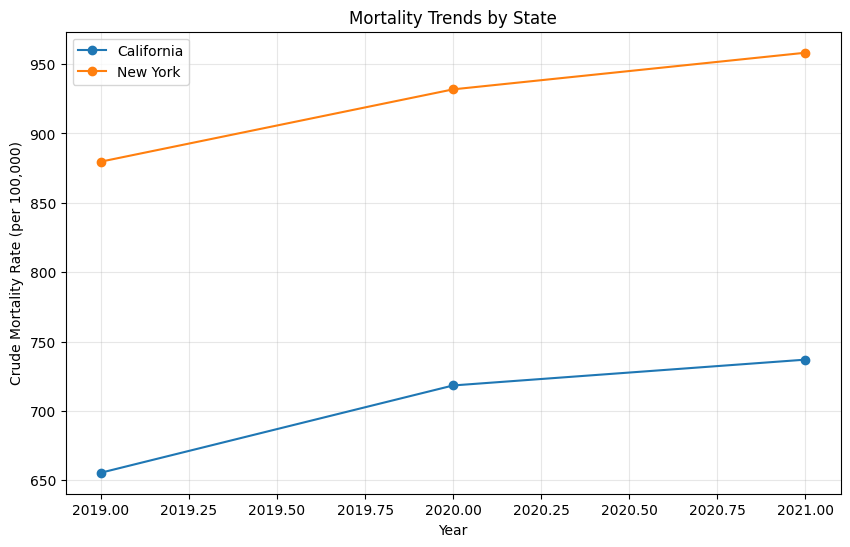

In [17]:
import matplotlib.pyplot as plt

if 'Crude Rate' in mortality.columns and 'Year' in mortality.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for state in mortality['State'].unique():
        state_data = mortality[mortality['State'] == state]
        ax.plot(state_data['Year'], state_data['Crude Rate'], marker='o', label=state)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Crude Mortality Rate (per 100,000)')
    ax.set_title('Mortality Trends by State')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()
else:
    print("Note: Crude Rate or Year not available in response")

## 5. Natality (Birth) Data

Get birth statistics:

In [18]:
# Attempt to get natality data for top 5 states
try:
    natality = cdc.get_natality_data(
        years=[2020, 2021],
        geo_level='state',
        states=['06', '48', '12', '36', '17']  # CA, TX, FL, NY, IL
    )
    
    print(f"✅ Retrieved {len(natality)} natality records")
    natality.head(10)
    
except Exception as e:
    print(f"❌ CDC WONDER API Error: {e}")
    print("\n⚠️  Using sample data for demonstration...")
    
    # Create sample data
    natality = pd.DataFrame({
        'Year': [2020, 2021] * 5,
        'State': ['California'] * 2 + ['Texas'] * 2 + ['Florida'] * 2 + ['New York'] * 2 + ['Illinois'] * 2,
        'Births': [420259, 416686, 368190, 377599, 220002, 224190, 209338, 207980, 138556, 135127]
    })
    print(f"📝 Sample data created: {len(natality)} records")
    natality

❌ CDC WONDER API Error: 500 Server Error: Internal Server Error for url: https://wonder.cdc.gov/controller/datarequest/D149

⚠️  Using sample data for demonstration...
📝 Sample data created: 10 records


### Compare Birth Rates

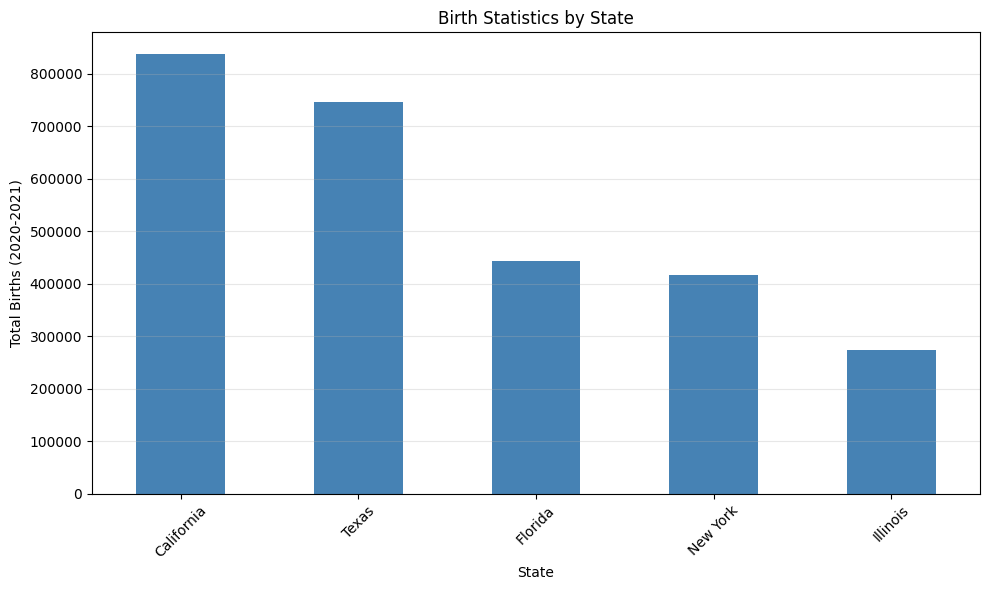

In [19]:
if 'Births' in natality.columns and 'State' in natality.columns:
    # Group by state and sum births
    births_by_state = natality.groupby('State')['Births'].sum().sort_values(ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    births_by_state.plot(kind='bar', ax=ax, color='steelblue')
    ax.set_xlabel('State')
    ax.set_ylabel('Total Births (2020-2021)')
    ax.set_title('Birth Statistics by State')
    ax.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Note: Births or State not available in response")

## 6. Population Estimates

Get population data:

In [20]:
# Attempt to get population estimates for all states
try:
    population = cdc.get_population_estimates(
        years=[2020],
        geo_level='state'
    )
    
    print(f"✅ Retrieved {len(population)} population records")
    population.head(10)
    
except Exception as e:
    print(f"❌ CDC WONDER API Error: {e}")
    print("\n⚠️  Using sample data for demonstration...")
    
    # Create sample data
    population = pd.DataFrame({
        'Year': [2020] * 10,
        'State': ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 
                  'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan'],
        'Population': [39538223, 29145505, 21538187, 20201249, 13002700, 
                       12812508, 11799448, 10711908, 10439388, 10077331]
    })
    print(f"📝 Sample data created: {len(population)} records")
    population

❌ CDC WONDER API Error: 500 Server Error: Internal Server Error for url: https://wonder.cdc.gov/controller/datarequest/D157

⚠️  Using sample data for demonstration...
📝 Sample data created: 10 records


### Top 10 Most Populous States

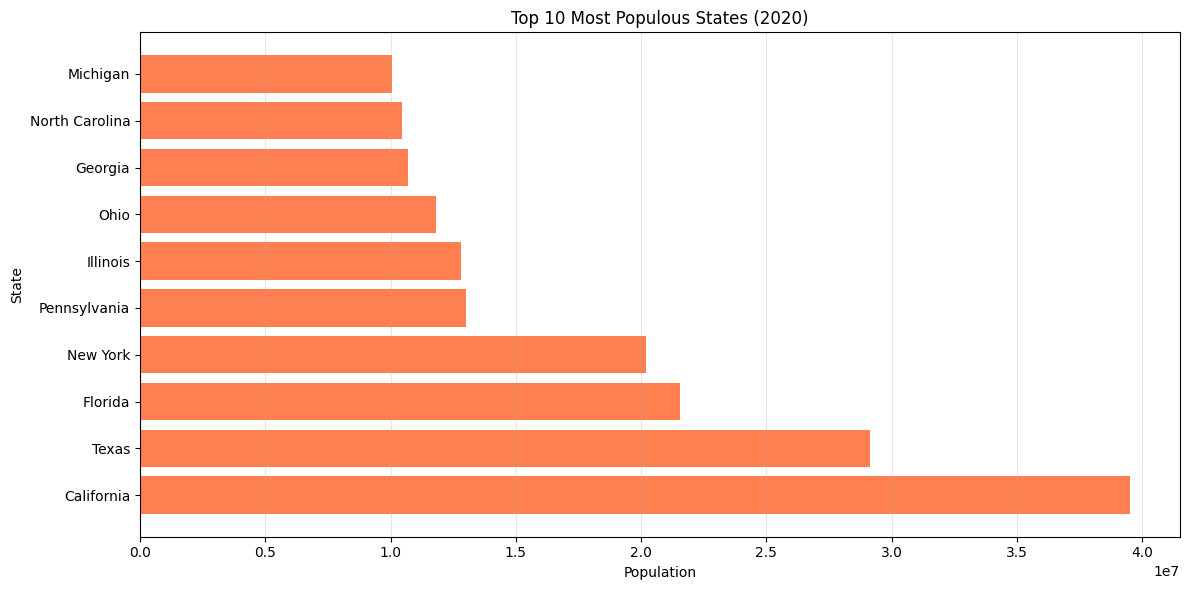

In [21]:
if 'Population' in population.columns and 'State' in population.columns:
    top_states = population.nlargest(10, 'Population')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(top_states['State'], top_states['Population'], color='coral')
    ax.set_xlabel('Population')
    ax.set_ylabel('State')
    ax.set_title('Top 10 Most Populous States (2020)')
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("Note: Population or State not available in response")

## 7. Advanced Query: Specific Causes of Death

Query mortality data by specific ICD-10 cause codes:

In [22]:
# Example: Heart disease deaths (I00-I09, I11, I13, I20-I51)
try:
    heart_disease = cdc.get_mortality_data(
        years=[2020],
        geo_level='state',
        states=['06', '36'],
        cause_of_death=['I00-I09', 'I11', 'I13', 'I20-I51']
    )
    
    print(f"✅ Retrieved {len(heart_disease)} heart disease mortality records")
    heart_disease.head()
    
except Exception as e:
    print(f"❌ CDC WONDER API Error: {e}")
    print("\n⚠️  CDC API unavailable. Using sample data...")
    
    heart_disease = pd.DataFrame({
        'Year': [2020, 2020],
        'State': ['California', 'New York'],
        'Cause': ['Heart Disease'] * 2,
        'Deaths': [69845, 38264],
        'Crude Rate': [176.7, 189.4]
    })
    print(f"📝 Sample data created: {len(heart_disease)} records")
    heart_disease

❌ CDC WONDER API Error: 500 Server Error: Internal Server Error for url: https://wonder.cdc.gov/controller/datarequest/D76

⚠️  CDC API unavailable. Using sample data...
📝 Sample data created: 2 records


## 8. Export Data

Save your data for further analysis:

In [23]:
# Export to CSV
mortality.to_csv('cdc_mortality_data.csv', index=False)
natality.to_csv('cdc_natality_data.csv', index=False)
population.to_csv('cdc_population_data.csv', index=False)

print("✅ Data exported successfully!")
print(f"  - Mortality: {len(mortality)} records")
print(f"  - Natality: {len(natality)} records")
print(f"  - Population: {len(population)} records")

✅ Data exported successfully!
  - Mortality: 6 records
  - Natality: 10 records
  - Population: 10 records


## 9. Summary Statistics

In [24]:
print("=" * 60)
print("CDC WONDER DATA SUMMARY")
print("=" * 60)

if not mortality.empty:
    print("\n📊 Mortality Data:")
    print(f"  Total records: {len(mortality)}")
    if 'Deaths' in mortality.columns:
        print(f"  Total deaths: {mortality['Deaths'].sum():,.0f}")
    if 'Crude Rate' in mortality.columns:
        print(f"  Avg crude rate: {mortality['Crude Rate'].mean():.2f} per 100,000")

if not natality.empty:
    print("\n👶 Natality Data:")
    print(f"  Total records: {len(natality)}")
    if 'Births' in natality.columns:
        print(f"  Total births: {natality['Births'].sum():,.0f}")

if not population.empty:
    print("\n🌎 Population Data:")
    print(f"  Total records: {len(population)}")
    if 'Population' in population.columns:
        print(f"  Total population: {population['Population'].sum():,.0f}")

print("\n" + "=" * 60)

CDC WONDER DATA SUMMARY

📊 Mortality Data:
  Total records: 6
  Total deaths: 1,385,111
  Avg crude rate: 813.43 per 100,000

👶 Natality Data:
  Total records: 10
  Total births: 2,717,927

🌎 Population Data:
  Total records: 10
  Total population: 179,266,447



## 10. Next Steps

**Additional Resources:**
- [CDC WONDER Documentation](https://wonder.cdc.gov/)
- [ICD-10 Codes Reference](https://www.cdc.gov/nchs/icd/icd10cm.htm)
- [KRL Data Connectors Documentation](https://github.com/KR-Labs/krl-data-connectors)

**Related Connectors:**
- HRSA Connector (healthcare facilities)
- County Health Rankings Connector
- EPA EJScreen Connector (environmental health)

**Use Cases:**
- Public health trend analysis
- Healthcare equity research
- Epidemiological studies
- Population health management
- Social determinants of health analysis

---

**Questions or Issues?**  
Visit: https://github.com/KR-Labs/krl-data-connectors/issues